# The Impact of Different Education Levels on Wage Trends and Gender Disparities in the U.S. Labor Market (1973–2022)

**Market:** United States  
**Goal:** Examine how wage levels and gender gaps vary across education levels and over time (1973–2022).  
**Data:** Public dataset (see source note below)  
**Methods:** pandas, numpy, seaborn, matplotlib  


> Data source: public dataset (DOI: https://doi.org/10.34740/kaggle/ds/3836009). 


## Imports

In [62]:
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

## Load data
Read the public dataset into a DataFrame.

In [64]:
#Data is sourced from Kaggle, DOI = https://doi.org/10.34740/kaggle/ds/3836009
educ_wages_data = pd.read_csv('wages_by_education.csv')
educ_wages_data.head()

,year,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,...,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
0,2022,16.52,21.94,24.81,41.60,53.22,17.99,24.08,27.96,49.01,...,13.89,17.83,20.36,29.94,39.41,14.74,18.18,20.64,31.13,40.64
1,2021,16.74,22.28,24.92,41.32,53.45,18.34,24.36,27.96,47.83,...,13.73,18.30,20.18,29.35,40.07,14.97,18.34,21.14,31.25,42.47
2,2020,17.02,22.70,25.44,41.65,53.74,18.76,25.09,28.55,48.15,...,13.66,17.93,20.31,31.38,42.44,14.58,18.50,20.69,31.55,44.15
3,2019,16.11,21.64,24.00,39.61,51.57,17.55,23.99,26.99,45.74,...,13.30,17.18,19.17,30.31,40.42,14.50,17.71,19.69,30.18,42.30
4,2018,15.94,21.50,23.70,38.87,51.03,17.70,23.72,26.61,44.97,...,12.48,16.81,18.57,30.85,39.64,13.47,17.28,19.29,29.47,39.35


## Quick data audit
Check missing values and dtypes.

In [66]:
#Checking for missing values
missing_values = educ_wages_data.isnull().sum()
data_types = educ_wages_data.dtypes

missing_values, data_types

(year                               0
 less_than_hs                       0
 high_school                        0
 some_college                       0
 bachelors_degree                   0
                                   ..
 hispanic_women_less_than_hs        0
 hispanic_women_high_school         0
 hispanic_women_some_college        0
 hispanic_women_bachelors_degree    0
 hispanic_women_advanced_degree     0
 Length: 61, dtype: int64,
 year                                 int64
 less_than_hs                       float64
 high_school                        float64
 some_college                       float64
 bachelors_degree                   float64
                                     ...   
 hispanic_women_less_than_hs        float64
 hispanic_women_high_school         float64
 hispanic_women_some_college        float64
 hispanic_women_bachelors_degree    float64
 hispanic_women_advanced_degree     float64
 Length: 61, dtype: object)

## 2022 wages by education level
Extract the overall (non-gender-split) wages for 2022 and build Figure 1.

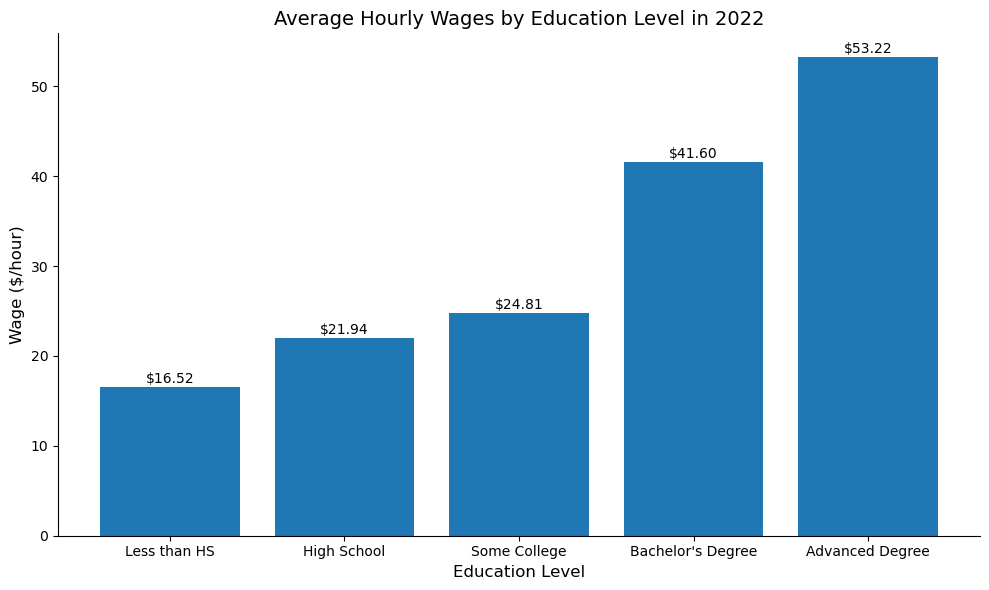

In [68]:
#Extract 2022 wage values by education level (overall, not gender-separated)
year_2022 = educ_wages_data[educ_wages_data["year"] == 2022].iloc[0]

education_levels = ['less_than_hs', 'high_school', 'some_college', 'bachelors_degree', 'advanced_degree']
wage_values = [year_2022[level] for level in education_levels]

edu_labels = [
    "Less than HS",
    "High School",
    "Some College",
    "Bachelor's Degree",
    "Advanced Degree"
]

#Creating bar chart to visualize average hourly wages by education in year 2022
fig1, ax1 = plt.subplots(figsize=(10, 6))
bars = ax1.bar(edu_labels, wage_values)

#Annotating the average hourly wages on top of the corresponding bar chart
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f"${height:.2f}", xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10)

ax1.set_title("Average Hourly Wages by Education Level in 2022", fontsize=14)
ax1.set_ylabel("Wage ($/hour)", fontsize=12)
ax1.set_xlabel("Education Level", fontsize=12)

sns.despine(ax=ax1)
plt.tight_layout()
fig1.savefig('figure1_average_hourly_wages_educ_level.png') 
plt.show()

## Summary statistics (2022)
Build **Table 1** comparing male vs female wages.

In [70]:
##Table 1: Summary Statistics of Wage Comparison between Men and Women in the year 2022

#Mapping education levels to their corresponding wages for men and women
#Gender wage gaps by education level

#Mapping educ levels to male/female columns
education_levels = {
    'less_than_hs': ('men_less_than_hs', 'women_less_than_hs'),
    'high_school': ('men_high_school', 'women_high_school'),
    'some_college': ('men_some_college', 'women_some_college'),
    'bachelors_degree': ('men_bachelors_degree', 'women_bachelors_degree'),
    'advanced_degree': ('men_advanced_degree', 'women_advanced_degree')
}

columns = ['year', 'education_level', 'wage_men', 'wage_women', 'wage_gap']
gender_wage_data = pd.DataFrame(columns=columns)

#Creating gender-wage data
for edu_level, (men_col, women_col) in education_levels.items():
    subset = educ_wages_data[['year', men_col, women_col]].copy()
    subset.columns = ['year', 'wage_men', 'wage_women']
    subset['education_level'] = edu_level
    subset['wage_gap'] = subset['wage_men'] - subset['wage_women']
    gender_wage_data = pd.concat([gender_wage_data, subset])

gender_wage_data.reset_index(drop=True, inplace=True)

#Extracting year 2022 summary
education_levels_display = {
    'less_than_hs': 'Less than High School',
    'high_school': 'High School',
    'some_college': 'Some College',
    'bachelors_degree': "Bachelor's Degree",
    'advanced_degree': 'Advanced Degree'
}

year_2022 = gender_wage_data[gender_wage_data["year"] == 2022]
summary_2022 = year_2022[["education_level", "wage_men", "wage_women", "wage_gap"]].copy()
summary_2022["education_level"] = summary_2022["education_level"].map(education_levels_display)
summary_2022.sort_values("education_level", inplace=True)
summary_2022.reset_index(drop=True, inplace=True)


# gender_wage_data.head()
summary_2022

/var/folders/ds/d2vngnrd72b0x5_lyzdtt3q80000gn/T/ipykernel_5678/2196411590.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gender_wage_data = pd.concat([gender_wage_data, subset])


,education_level,wage_men,wage_women,wage_gap
0,Advanced Degree,63.51,44.34,19.17
1,Bachelor's Degree,49.01,34.39,14.62
2,High School,24.08,18.93,5.15
3,Less than High School,17.99,14.33,3.66
4,Some College,27.96,21.76,6.20


## Sort & prep for time-series visuals

In [72]:
#sorting values by year
df_sorted = educ_wages_data.sort_values("year")

## Figure 2 — Gender wage gap over time

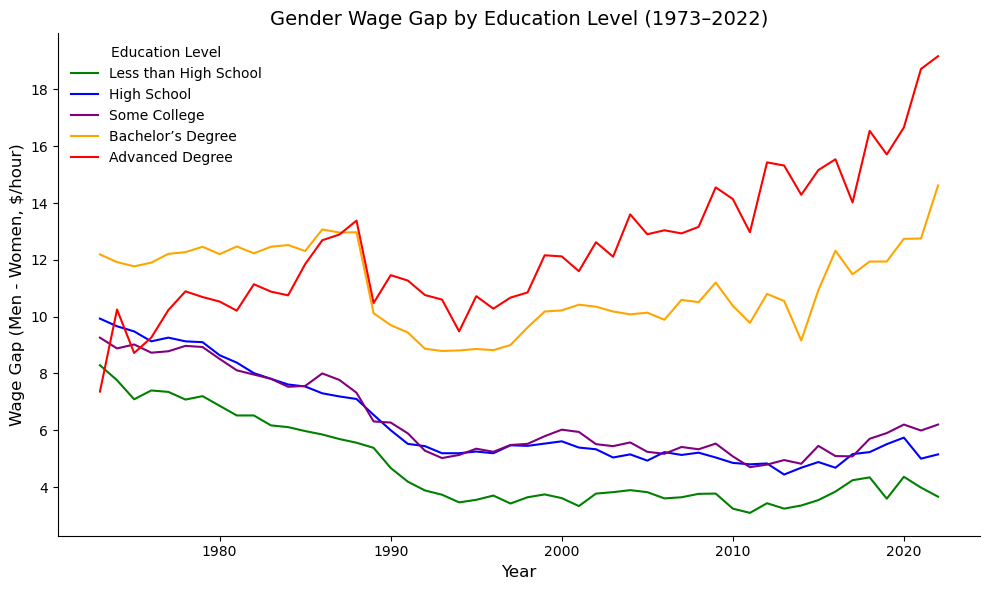

In [74]:
#creating Figure 2: Gender Wage Gap by Education Level

fig2, ax2 = plt.subplots(figsize=(10, 6))

#calculating wage gaps
gap_less_than_hs = df_sorted["men_less_than_hs"] - df_sorted["women_less_than_hs"]
gap_high_school = df_sorted["men_high_school"] - df_sorted["women_high_school"]
gap_some_college = df_sorted["men_some_college"] - df_sorted["women_some_college"]
gap_bachelors = df_sorted["men_bachelors_degree"] - df_sorted["women_bachelors_degree"]
gap_advanced = df_sorted["men_advanced_degree"] - df_sorted["women_advanced_degree"]

#using different colors to differentiate between education level
ax2.plot(df_sorted["year"], gap_less_than_hs, label="Less than High School", color="green")
ax2.plot(df_sorted["year"], gap_high_school, label="High School", color="blue")
ax2.plot(df_sorted["year"], gap_some_college, label="Some College", color="purple")
ax2.plot(df_sorted["year"], gap_bachelors, label="Bachelor’s Degree", color="orange")
ax2.plot(df_sorted["year"], gap_advanced, label="Advanced Degree", color="red")

ax2.set_title("Gender Wage Gap by Education Level (1973–2022)", fontsize=14)
ax2.set_xlabel("Year", fontsize=12)
ax2.set_ylabel("Wage Gap (Men - Women, $/hour)", fontsize=12)
ax2.legend(title="Education Level", loc="upper left", frameon=False)

sns.despine(ax=ax2)
plt.tight_layout()
fig2.savefig('figure2_gender_wage_gap_over_time.png') 
plt.show()

## 2022 wages by education (bar)

In [76]:
# wages by education level for 2022
year_2022 = educ_wages_data[educ_wages_data["year"] == 2022]

men_wages_2022 = year_2022[['men_high_school', 'men_bachelors_degree', 'men_advanced_degree']].iloc[0]
women_wages_2022 = year_2022[['women_high_school', 'women_bachelors_degree', 'women_advanced_degree']].iloc[0]

## Wage elasticity across education levels (2022)

In [78]:
# Estimate wage elasticity: % increase from one level to the next (year 2022)
def calculate_elasticity_fixed(wages):
    return {
        'High School to Bachelor\'s': (wages.iloc[1] - wages.iloc[0]) / wages.iloc[0] * 100,
        'Bachelor\'s to Advanced Degree': (wages.iloc[2] - wages.iloc[1]) / wages.iloc[1] * 100
    }

elasticity_men_fixed = calculate_elasticity_fixed(men_wages_2022)
elasticity_women_fixed = calculate_elasticity_fixed(women_wages_2022)

elasticity_men_fixed, elasticity_women_fixed

({"High School to Bachelor's": 103.5299003322259,
  "Bachelor's to Advanced Degree": 29.585798816568047},
 {"High School to Bachelor's": 81.66930797675647,
  "Bachelor's to Advanced Degree": 28.932829310846188})

## Helper: ordered education levels

In [80]:
education_levels_sorted = sorted(education_levels.keys())

## Figure 3 — Wage trends by gender across education levels

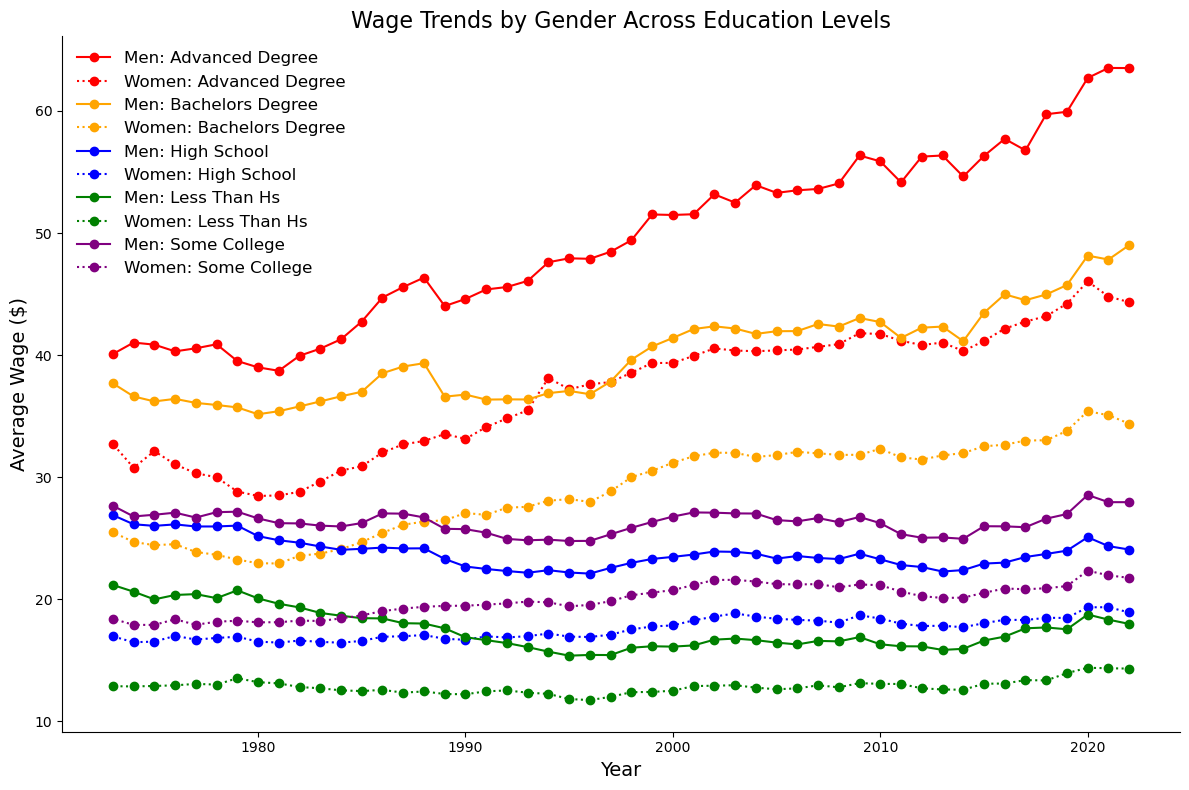

In [82]:
#creating figure 3: Wage Trends by Gender Across Education Levels

fig3, ax3 = plt.subplots(figsize=(12,8))

#looping through each edu level, and assign colors for consistency
for edu_level,col in zip(education_levels_sorted,['red', 'orange', 'blue', 'green', 'purple']):
    subset = gender_wage_data[gender_wage_data['education_level'] == edu_level]
    ax3.plot(subset['year'], subset['wage_men'], label=f'Men: {edu_level.replace("_", " ").title()}', color = col, marker = 'o') #plotting for men
    ax3.plot(subset['year'], subset['wage_women'], label=f'Women: {edu_level.replace("_", " ").title()}', linestyle=':', color = col, marker = 'o') #plotting for women

ax3.set_title('Wage Trends by Gender Across Education Levels', fontsize = 16)
ax3.set_ylabel('Average Wage ($)', fontsize=14)
ax3.set_xlabel('Year', fontsize=14)
ax3.legend(loc='upper left', frameon=False, fontsize = 12) 

sns.despine(ax=ax3)
plt.tight_layout()
plt.show()

fig3.savefig('figure3_wage_trends_by_gender.png') 

## Key takeaways
- Wages increase with education in every observed year.
- Gender gaps persist across education levels; narrowing in some periods but non-zero by 2022.

## Next steps
- Add confidence intervals and regression controls.
- Extend to country/state comparisons.
- Package figure generation into reusable functions.
